In [1]:
import fiberphotometry as fp
import behavior as beh
from tdt import read_block

%config Completer.use_jedi = False
%matplotlib inline

In [4]:
BLOCK_PATH = '/data/gergely/invivo_DATA/fiberPhotometry/dock05b-1-210224-104500/EEGCamFP2-210312-104004/'
data = read_block(BLOCK_PATH)

Found Synapse note file: /data/gergely/invivo_DATA/fiberPhotometry/dock05b-1-210224-104500/EEGCamFP2-210312-104004/Notes.txt
read from t=0s to t=1693.63s


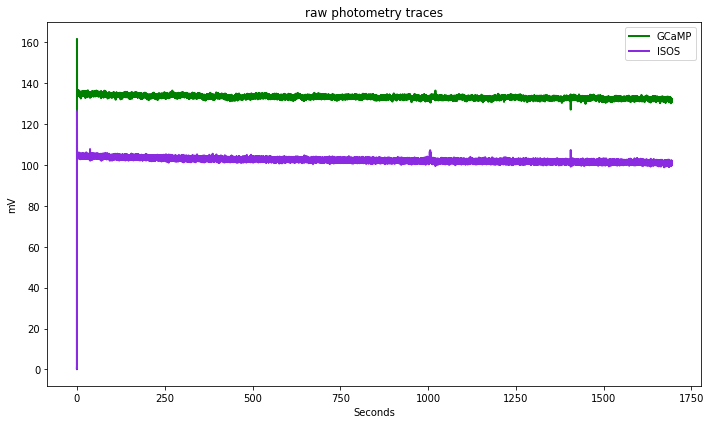

In [4]:
fp.plotting(data, kind='raw')

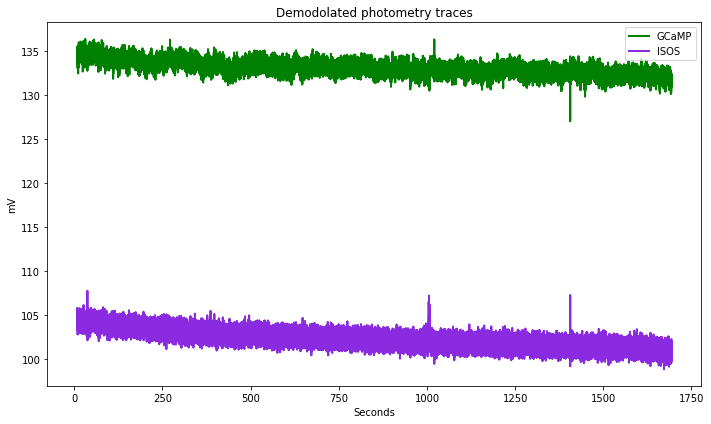

In [5]:
fp.plotting(data, kind='rawDemod')

/home/gergely/code/fiberPhotometry_YP/fiberphotometry.py:149: RankWarning: Polyfit may be poorly conditioned
  dFF = detrending(data)


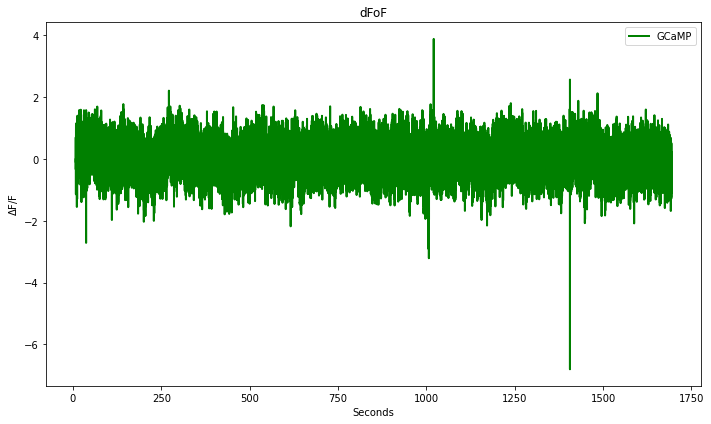

In [6]:
fp.plotting(data, kind='dfof')

In [13]:
import matplotlib.pyplot as plt
import numpy as np
# import scipy as sp
# from scipy import io as sio
# from PIL import Image as im
# import sima

In [7]:
data_path = ('/data/gergely/invivo_DATA/fiberPhotometry/tracking/dock1/overnite_rec/2021-03-21 13-30-54.mat')
# data = sio.loadmat(data_path)
data = beh.load_tracking(data_path)

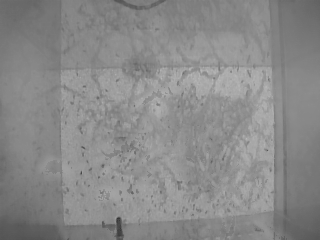

In [8]:
beh.show_background(data)

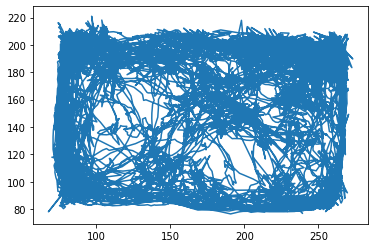

In [9]:
beh.show_tracking(data)

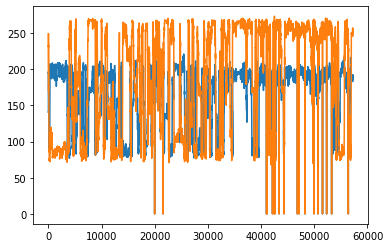

In [62]:
plt.plot(track_data[0:,2])
plt.plot(track_data[0:,1])

In [10]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'versionName', 'mouseID', 'recorderName', 'ArduHistory', 'Note', 'ROI', 'bkImg2D', 'ROIMap', 'recordedTime', 'ROIscoreData', 'actHistPars', 'actHistData', 'actHistState', 'trackData', 'velocityData', 'moveTag', 'checkFrames', 'sleepData', 'laserEvent', 'laserInfo', 'motionPIRData', 'actHistDataPIR', 'ampLiveData', 'filename'])

In [30]:
data['velocityData']

array([[ 0.00000000e+00,  2.36718866e+02, -2.50620171e+00],
       [ 3.79686419e-01,  2.13436173e+00, -6.54841384e-01],
       [ 7.59372838e-01,  2.30181754e+02,  6.75404853e-01],
       ...,
       [ 3.59939358e+03,  1.62004437e+01, -2.58661124e+00],
       [ 3.59946197e+03,  1.00239977e+01,  1.72248308e-01],
       [ 3.59953036e+03,  5.12797551e+01,  2.20658901e+00]])

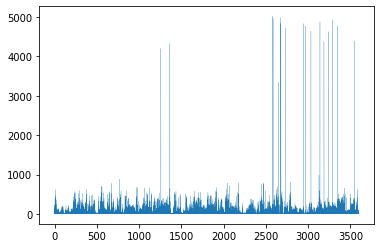

In [11]:
plt.plot(data['velocityData'][0:,0], data['velocityData'][0:,1], linewidth=.2)

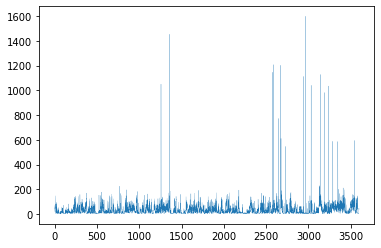

In [36]:
plt.plot( decimatedData['decimatedTime'], decimatedData['decimatedSignal'], linewidth=.2)

In [2]:
data['velocityData'][0:,1]

NameError: name 'data' is not defined

In [14]:
decimatedData = {}
decimatedSignal = []
decimatedTime = []
N = 100

for i in range(0, len(data['velocityData'][0:,1]), N):        
        # This is the moving window mean
        mean_wnd = np.mean(data['velocityData'][0:,1][i:i+N-1])
        decimatedSignal.append(mean_wnd)
np.array(decimatedSignal)
    
time_x = data['velocityData'][0:,0]
time_x = time_x[::N] # go from beginning to end of array in steps on N
time_x = time_x[:len(data['velocityData'][0:,1])]

decimatedData['decimatedSignal'] = decimatedSignal
decimatedData['decimatedTime'] = time_x

In [18]:
from scipy.signal import butter, filtfilt

In [19]:
velo = np.array(decimatedData['decimatedSignal'])

In [21]:
b, a = butter(3, 0.1)
y = filtfilt(b,a, velo)

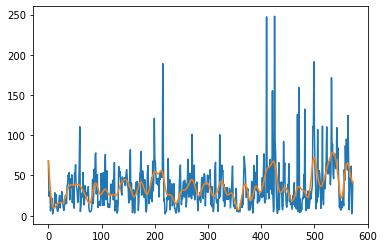

In [22]:
plt.plot(velo)
plt.plot(y)

### check the plot w/o decimation

In [50]:
def reject_outliers(velo, m=2):
    return velo[abs(velo - np.mean(velo)) < m * np.std(velo)]

In [ ]:
reject

In [57]:
filt_velo = reject_outliers(velo)

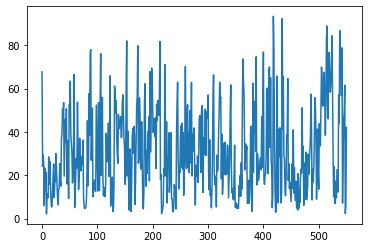

In [58]:
plt.plot(filt_velo)